# Caso 1: Luz coherente.

Un haz de luz monocromática totalmente polarizado lo podemos representar de la siguiente forma:

$$\mathbf{E}(t) = \mathbf{\hat{i}}E_{0x}\cos(k \cdot \mathbf{r} - \omega t) + \mathbf{\hat{j}}E_{0y}\cos(k \cdot \mathbf{r} - \omega t + \epsilon)$$

donde $t$ es el tiempo, $k$ es el número de onda, $\mathbf{r}$ es la distancia de propagación, $\omega$ es la frecuencia angular, $\epsilon$ es el retardo de fase, y $E_{0x}$ y $E_{0y}$ son las amplitudes en la dirección $x$ y $y$ respectivamente.

In [2]:
from ipywidgets.widgets.widget_string import Label
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,widgets
from sympy import *
from sympy.solvers.solveset import linsolve
from scipy.integrate import odeint
plt.style.use('bmh')



def anim2(ep):

    ep = float(ep)   #se elije h como el parámetro que varía, son a su vez las condiciones iniciales 
    x0 = 5; y0 = 5  # Amplitudes de los campos en cada eje coordenado 
      # Fase de retardo en cada eje coordenado (un ej: 1*np.pi/2)
    wt = np.arange(0,2*np.pi,0.1) # Rango de wt
    Ex = x0*np.cos(-wt)
    Ey = y0*np.cos(-wt + ep)
    xm = np.min(Ex) - 1.5
    xM = np.max(Ex) + 1.5
    ym = np.min(Ey) - 1.5
    yM = np.max(Ey) + 1.5

    # plot resultados
    plt.plot(Ex,Ey,'k-',linewidth=2,label='$Desfase=$'+str(round(ep,3)))
    #plt.plot(x,y2,'b-',linewidth=1,label=str(w_1))
    #plt.plot(x,z_cerca_1,'g-',linewidth=1,label='k=0.1')
    plt.xlabel('$Ex$')
    plt.ylabel('$Ey$')
    plt.xlim(np.min([xm,ym]),np.max([xM,yM]))
    plt.ylim(np.min([xm,ym]),np.max([xM,yM]))
    plt.legend()

In [3]:
opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,         
        ep= widgets.FloatSlider(min=0.001,max=np.pi,value=1,step=0.1,**opc), 
        #mm
        );

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='ep', max=3.141592653589793,…

In [4]:
import plotly.graph_objects as go

x0 = 7.93725393; y0 = 5.83095189  # Amplitudes de los campos en cada eje coordenado 
ep = 0.3  # Fase de retardo en cada eje coordenado (un ej: 1*np.pi/2)
wt = np.arange(0,2*np.pi,0.1) # Rango de wt
# Generate curve data
x = x0*np.cos(-wt)
y = y0*np.cos(-wt + ep)
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 10
wts = np.linspace(0,2.2*np.pi,N) # Rango de wt
xx = x0*np.cos(-wts)
yy = y0*np.cos(-wts + ep)


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Polarización del campo", hovermode="closest",autosize=False,height=600,width=600,
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N)]
)

fig.show()

## Parámetros de Stokes

En la practica un método que permite determinar el estado de polarización de la luz es mediante los parametros de Stokes, los cuales son:

Consideremos un campo electrico descrito por:

$$\mathbf{E}= \hat{x} E_{x0} \text{cos}\left[ (\bar{k}z-\bar{\omega}t)+\delta_x(t)\right]+\hat{y} E_{x0} \text{cos}\left[ (\bar{k}z-\bar{\omega}t)+\delta_y(t)\right]$$


$$ S_0 = 2I_0 = \left \langle E_{x0}^2  \right \rangle + \left \langle E_{y0}^2   \right \rangle$$
$$ S_1 = 2I_1-2I_0 = \left \langle E_{x0}^2  \right \rangle- \left \langle E_{y0}^2   \right \rangle$$
$$ S_2 = 2I_2-2I_0 = \left \langle 2E_{x0}E_{y0}\cos\epsilon  \right \rangle$$
$$ S_3 = 2I_3-2I_0= \left \langle 2E_{y0}E_{y0}\sin\epsilon  \right \rangle$$

Los parámetros de Stokes que se obtendrían (vector de Stokes) serían los siguientes:

In [5]:
S = np.zeros(4)
S[0] = x0**2 + y0**2
S[1] = x0**2 - y0**2
S[2] = 2*x0*y0*np.cos(ep)
S[3] = 2*x0*y0*np.sin(ep)

print('S =',S)

S = [96.99999989 29.00000001 88.4292811  27.35438217]


In [6]:
#variables
E0x2 , E0y2 = symbols('E_{0x}^2 E_{0y}^2', real=True)

ans = linsolve([E0x2 + E0y2 - S[0], E0x2 - E0y2 - S[1]],(E0x2,E0y2))
E0aux = next(iter(ans))
E0 = np.sqrt(np.array((float(np.asarray(E0aux[0])),float(np.asarray(E0aux[1])))))
print('[E_x0 E_y0] =',E0)
fi3 = np.arctan(S[3]/S[2])+np.pi
print('epsilon = %.3f rad'% fi3)

[E_x0 E_y0] = [7.93725393 5.83095189]
epsilon = 3.442 rad


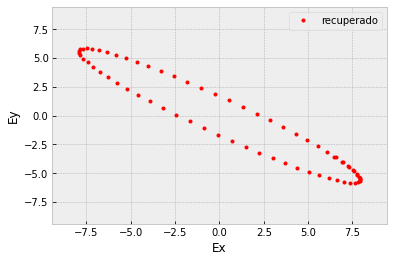

In [7]:
wt = np.arange(0,2.2*np.pi,0.1)
Exr = E0[0]*np.cos(wt )
Eyr = E0[1]*np.cos(wt + fi3)

xm = np.min(Exr) - 1.5
xM = np.max(Exr) + 1.5
ym = np.min(Eyr) - 1.5
yM = np.max(Eyr) + 1.5

plt.figure()
#plt.plot(Ex,Ey,'b',label='original')
plt.plot(Exr,Eyr,'r.',label='recuperado')
plt.xlabel('Ex')
plt.ylabel('Ey')
plt.xlim(np.min([xm,ym]),np.max([xM,yM]))
plt.ylim(np.min([xm,ym]),np.max([xM,yM]))
plt.legend()
plt.show()


# Problema de las paletas.

Por simplicidad asumamos que antes de la fibra se tiene:


$$\mathbf{E}(\mathbf{r},t) = \mathbf{\hat{i}}E_{0x}(\mathbf{r},t)\cos(k \cdot \mathbf{r} - \omega t+\phi_x) + \mathbf{\hat{j}}E_{0y}(\mathbf{r},t)\cos(k \cdot \mathbf{r} - \omega t + \phi_y)$$

Esto es posible en general para ondas quasi-monocromaticas debido a que para un campo electrico arbitrario [3],

$$\mathbf{E}(\mathbf{r},t)=\int_{\Delta \omega}d \omega \hspace{0.1cm} \tilde{\mathbf{E}}_{\omega}(\mathbf{r},\omega)\text{e}^{-i[\omega t-g_{\omega}(\mathbf{r})]}=\mathbf{A}(\mathbf{r},t) \text{e}^{-i[\bar{\omega} t-g_{\bar{\omega}}(\mathbf{r})]}$$

Siendo $\mathbf{A}(\mathbf{r},t)=\int_{\Delta \omega}d \omega \hspace{0.1cm} \tilde{\mathbf{E}}_{\omega}(\mathbf{r},\omega)  \text{e}^{-i[(\omega-\bar{\omega}) t-(g_{{\omega}}(\mathbf{r})-g_{\bar{\omega}}(\mathbf{r})]}$. Si describimos mediante notación compleja el campo $\mathbf{E}(\mathbf{r},t)$, podemos denotar $A_{x}=E_{0x}$ y $A_{y}=E_{0y}\text{exp}(-i \Gamma)$ los coeficiente relevantes para la descripción de la polarización del campo y por tanto mediante el formalismo de Jones, denotar el vector inicial de Jones como,

$$J_1=\begin{pmatrix}
A_{x}\\ 
A_{y}
\end{pmatrix}$$

Al atravesar un medio lineal, el cambio de la polarización del campo electrico puede ser descrito mediante el formalismo de matrices de Jones,

$$J_{2}=T J_1$$

Siendo T la matrix de transferencia del medio. Cuando la fibra es enrollada en la paleta, el estres en la flexión crea birefringencia [thorlabs]. Es sabido que la birefringencia crea un desfase $\Gamma$ en una de las componentes del campo electrico. Sea $\mathbf{y}$ la componente del campo que desfasa, por tanto,

$$J_{2}=T J_1=\begin{pmatrix}
1 & 0 \\ 
0 & e^{-i\Gamma}
\end{pmatrix}
\begin{pmatrix}
E_{0x}e^{i\phi_x}\\ 
E_{0y}e^{i\phi_y}
\end{pmatrix}$$

Estrictamente, esta expresión es deducida asumiento que en la birrefringencia uno de los indices de refracción es cercano al indice de refracción antes de la onda ingresar al medio y otro diferente, además de asumir que los ejes del cristal no estan rotados. Considerando que el eje de birrefringencia que no cambia esta en la paleta y otro es perpendicular a este, tenemos que:


$$T_{\theta}=\begin{pmatrix}
\cos\theta & -\sin\theta \\ 
\sin\theta & \cos\theta
\end{pmatrix}
\begin{pmatrix}
1 & 0 \\ 
0 & e^{-i\Gamma}
\end{pmatrix}
\begin{pmatrix}
\cos\theta & \sin\theta \\ 
-\sin\theta & \cos\theta
\end{pmatrix}=\begin{pmatrix}
\cos^2\theta+\exp(-i\Gamma)\sin^2\theta &  \sin\theta\cos\theta(1-\exp(-i\Gamma))\\  
\sin\theta\cos\theta(1-\exp(-i\Gamma)) &  \sin^2\theta+\exp(-i\Gamma)\cos^2\theta 
\end{pmatrix}$$ 

En el caso del sistema de las tres paletas,

$$ T=T_{\theta_{3}}T_{\theta_{2}}T_{\theta_{1}} $$


In [8]:
a=0.133; N=1; d=5e-6; wl=1550e-9; D=56e-3  #Parametros del retardo.

#gamma=2*np.pi**2*a*N*d**2/(wl*D)
c=np.pi/180
def Tt(theta,gamma):
    
    
    T=np.array([[np.cos(theta*c)**2+np.exp(-1j*gamma)*np.sin(theta*c)**2,np.cos(theta*c)*np.sin(theta*c)*(1-np.exp(-1j*gamma))],
               [np.cos(theta*c)*np.sin(theta*c)*(1-np.exp(-1j*gamma)),np.sin(theta*c)**2+np.exp(-1j*gamma)*np.cos(theta*c)**2]])
    return T


In [17]:

def anim2(ep,ang1,ang2,ang3):
    
    f = plt.figure(figsize=(12, 5),dpi=200)
    
    ep = float(ep)   #se elije h como el parámetro que varía, son a su vez las condiciones iniciales 

    ang1=float(ang1)
    ang2=float(ang2)
    ang3=float(ang3)

    x0 = 3; y0 = 0  # Amplitudes de los campos en cada eje coordenado 
      # Fase de retardo en cada eje coordenado (un ej: 1*np.pi/2)
    wt = np.arange(0,2*np.pi,0.1) # Rango de wt
    
    phix=0 ; phiy=ep

    Ex = x0*np.cos(-wt)
    Ey = y0*np.cos(-wt + ep)
    
    xm = np.min(Ex) - 1.5
    xM = np.max(Ex) + 1.5
    ym = np.min(Ey) - 1.5
    yM = np.max(Ey) + 1.5
    
    plt.subplot( 1,2, 1)
    # plot resultados
    plt.plot(Ex,Ey,'k-',linewidth=2,label='$Desfase=$'+str(round(ep,3)))
    #plt.plot(x,y2,'b-',linewidth=1,label=str(w_1))
    #plt.plot(x,z_cerca_1,'g-',linewidth=1,label='k=0.1')
    plt.xlabel('$Ex$')
    plt.ylabel('$Ey$')
    plt.xlim(np.min([xm,ym]),np.max([xM,yM]))
    plt.ylim(np.min([xm,ym]),np.max([xM,yM]))
    plt.legend()
    plt.title('Polarización de entrada: '+str(np.sqrt(x0**2+y0**2)))
    
    plt.subplot( 1,2, 2)
    
    desf1=np.pi/2 ; desf2=np.pi; desf3=np.pi/2;  #
    
    T1=Tt(ang1, desf1) ; T2=Tt(ang2, desf2) ; T3=Tt(ang3, desf3)
    
    T=T3@T2@T1
    
    J1=np.array([x0*np.exp(1j*phix),y0*np.exp(1j*phiy)])
    
    J2=T@J1
    print(J2)
    Ex = np.abs(J2[0])*np.cos(-wt+np.angle(J2[0]))
    Ey = np.abs(J2[1])*np.cos(-wt+ep+np.angle(J2[1]))
    
    plt.plot(Ex,Ey,'k-',linewidth=2,label='$Desfase=$'+str(round(ep,3)))
    #plt.plot(x,y2,'b-',linewidth=1,label=str(w_1))
    #plt.plot(x,z_cerca_1,'g-',linewidth=1,label='k=0.1')
    plt.xlabel('$Ex$')
    plt.ylabel('$Ey$')
    plt.xlim(np.min([xm,ym]),np.max([xM,yM]))
    plt.ylim(np.min([xm,ym]),np.max([xM,yM]))
    plt.legend()
    plt.title('Polarización de salida: '+str(round(np.sqrt(np.abs(J2[0])**2+np.abs(J2[1]**2)),3)))
    
    
    

In [18]:
opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,         
        ep= widgets.FloatSlider(min=0.001,max=np.pi,value=1,step=0.1,**opc), 
        ang1=widgets.FloatSlider(min=0,max=180,value=1,step=0.1,**opc),
        ang2= widgets.FloatSlider(min=0,max=180,value=1,step=0.1,**opc),
        ang3= widgets.FloatSlider(min=0,max=180,value=1,step=0.1,**opc),
        #mm
        );



interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='ep', max=3.141592653589793,…

In [16]:
J2

NameError: ignored